In [5]:
import pandas as pd
import os, glob
from pprint import pformat

In [30]:
import bokeh
from bokeh.plotting import figure, ColumnDataSource, show
from bokeh.models.ranges import Range1d
from bokeh.models import BoxSelectTool
from bokeh.embed import components

In [46]:
!head result-aware.dat

Nodes;Tasks;electrons;cbands;diaghg;Xegterg;vloc_psi;h_psi;sum_band;walltime;vloc_calls
1;4;59.37;46.75;10.60;39.34;13.61;19.42;8.45;70.01;284.0
2;8;55.97;45.04;10.73;41.04;17.99;23.50;8.06;63.75;276.0
4;16;56.67;46.03;11.69;43.38;20.59;25.76;8.33;64.69;284.0
6;24;57.45;47.72;12.44;45.58;18.09;24.63;7.80;67.24;297.0
8;32;86.53;71.38;11.01;69.46;42.20;48.92;13.30;96.74;282.0
12;48;92.87;76.78;11.62;75.14;51.57;57.61;14.44;104.07;285.0


In [7]:
file=open('result-aware.dat')

In [8]:
df = pd.read_csv(file, delimiter=';', index_col=1)

In [10]:
df = df.drop(['Nodes','vloc_calls'],axis=1)

In [69]:
df.index.tolist()

[46.75, 45.04, 46.03, 47.72, 71.38, 76.78]

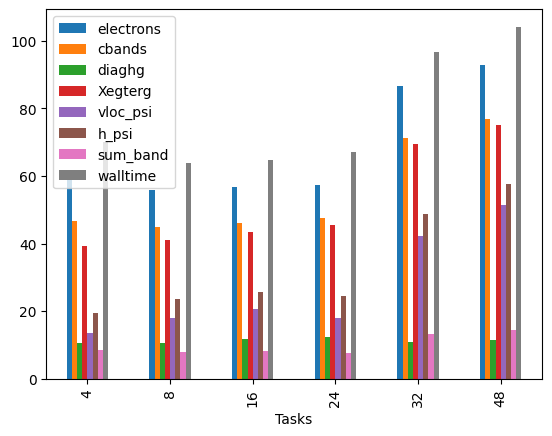

In [17]:
plot=df.plot.bar()

In [78]:
import pandas as pd
from bokeh.plotting import figure, output_file, show
from bokeh.transform import dodge
from bokeh.models import ColumnDataSource

# Read CSV file with pandas
df = pd.read_csv('result-aware.dat', delimiter=';')

# Set the index to 'Nodes' column
df.set_index('Nodes', inplace=True)

# Convert the DataFrame to the long format for grouped bar plot
df_long = df.stack().reset_index()
df_long.columns = ['Nodes', 'Variable', 'Value']

# Create a Bokeh figure
#output_file("grouped_bar_plot.html")
p = figure(x_range=df.index.astype(str), height=400, title="Grouped Bar Plot Example")

# List of variables to plot
variables = df.columns.tolist()

# Colors for bars
colors = ["#c9d9d3", "#718dbf", "#e84d60", "#ddb7b1", "#FFC300", "#27AE60", "#3498DB", "#FF5733", "#6C3483"]

# Create bars for each variable
for i, var in enumerate(variables):
    p.vbar(x=dodge('Nodes', 0.2*i, range=p.x_range), top='Value', width=0.2, source=df_long[df_long['Variable'] == var],
           color=colors[i], legend_label=var)

# Customize plot appearance
p.y_range.start = 0
p.xgrid.grid_line_color = None
p.yaxis.axis_label = "Values"
p.legend.location = "top_left"
p.legend.title = "Variables"

# Show the plot
show(p)


ValueError: Unrecognized range input: 'Index(['1', '2', '4', '6', '8', '12'], dtype='object', name='Nodes')'

In [23]:
source = ColumnDataSource(df)

In [33]:
source.data

{'Tasks': array([ 4,  8, 16, 24, 32, 48]),
 'electrons': array([59.37, 55.97, 56.67, 57.45, 86.53, 92.87]),
 'cbands': array([46.75, 45.04, 46.03, 47.72, 71.38, 76.78]),
 'diaghg': array([10.6 , 10.73, 11.69, 12.44, 11.01, 11.62]),
 'Xegterg': array([39.34, 41.04, 43.38, 45.58, 69.46, 75.14]),
 'vloc_psi': array([13.61, 17.99, 20.59, 18.09, 42.2 , 51.57]),
 'h_psi': array([19.42, 23.5 , 25.76, 24.63, 48.92, 57.61]),
 'sum_band': array([ 8.45,  8.06,  8.33,  7.8 , 13.3 , 14.44]),
 'walltime': array([ 70.01,  63.75,  64.69,  67.24,  96.74, 104.07])}

In [38]:
source.data['Tasks']

array([ 4,  8, 16, 24, 32, 48])

In [56]:
p = figure(x_range= XXXXXX, plot_width=800, plot_height=600, title="Title", x_axis_label="x-label",
          tools="pan,box_select,zoom_in,zoom_out,save,reset")

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().